# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [122]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(len(cities))

612


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [124]:
citiesdf=pd.DataFrame(cities)
citiesdf.rename(columns={0:"City"}, inplace=True)
citiesdf["Lat"]=None
citiesdf["Lng"]=None
citiesdf["Temperature (F)"]=None
citiesdf["Humidity (%)"]=None
citiesdf["Cloudiness (%)"]=None
citiesdf["Wind Speed (mph)"]=None
url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

for index, row in citiesdf.iterrows():
    try:
        response=requests.get(url+row["City"]).json()
        row["Lng"]=response["coord"]["lon"]
        row["Lat"]=response["coord"]["lat"]
        row["Temperature (F)"]=response["main"]["temp"]
        row["Humidity (%)"]=response["main"]["humidity"]
        row["Cloudiness (%)"]=response["clouds"]["all"]
        row["Wind Speed (mph)"]=response["wind"]["speed"]
        print(f"Processing the data for City #{index}: {row['City']}")
    except(KeyError):
        print(f"Error with City #{index}: {row['City']}")
    

Processing the data for City #0: yulara
Processing the data for City #1: praia da vitoria
Processing the data for City #2: meulaboh
Processing the data for City #3: mawlaik
Error with City #4: kadykchan
Processing the data for City #5: yarada
Processing the data for City #6: livermore
Processing the data for City #7: faanui
Processing the data for City #8: nikolskoye
Processing the data for City #9: kriel
Processing the data for City #10: georgetown
Processing the data for City #11: gamba
Processing the data for City #12: mataura
Processing the data for City #13: nhulunbuy
Processing the data for City #14: angoche
Error with City #15: palabuhanratu
Processing the data for City #16: albany
Processing the data for City #17: great yarmouth
Processing the data for City #18: punta arenas
Processing the data for City #19: vaini
Processing the data for City #20: hay river
Processing the data for City #21: jamestown
Processing the data for City #22: pevek
Processing the data for City #23: kodi

Processing the data for City #194: la ronge
Processing the data for City #195: fiditi
Processing the data for City #196: narbonne
Processing the data for City #197: mezen
Error with City #198: belushya guba
Error with City #199: toliary
Processing the data for City #200: thunder bay
Processing the data for City #201: iqaluit
Processing the data for City #202: portel
Processing the data for City #203: lorengau
Error with City #204: vaitupu
Processing the data for City #205: nambucca heads
Processing the data for City #206: nizwa
Error with City #207: armacao dos buzios
Processing the data for City #208: provideniya
Processing the data for City #209: murrhardt
Error with City #210: attawapiskat
Processing the data for City #211: garissa
Processing the data for City #212: ratnagiri
Processing the data for City #213: avarua
Processing the data for City #214: reconquista
Processing the data for City #215: pacific grove
Processing the data for City #216: bahia blanca
Processing the data for 

Processing the data for City #385: clarksburg
Processing the data for City #386: xai-xai
Processing the data for City #387: xinzhi
Processing the data for City #388: kingman
Processing the data for City #389: murdochville
Processing the data for City #390: soyo
Processing the data for City #391: lata
Processing the data for City #392: balabac
Processing the data for City #393: pulandian
Processing the data for City #394: northam
Processing the data for City #395: santiago de cao
Processing the data for City #396: port shepstone
Processing the data for City #397: praia
Processing the data for City #398: dingle
Processing the data for City #399: aksarka
Processing the data for City #400: mehamn
Processing the data for City #401: naberera
Processing the data for City #402: jalu
Processing the data for City #403: thinadhoo
Processing the data for City #404: conakry
Processing the data for City #405: havre-saint-pierre
Processing the data for City #406: dudinka
Processing the data for City 

Processing the data for City #574: tessalit
Processing the data for City #575: hailey
Processing the data for City #576: vondrozo
Error with City #577: kuche
Processing the data for City #578: evensk
Processing the data for City #579: kavieng
Processing the data for City #580: luderitz
Processing the data for City #581: buala
Processing the data for City #582: koboko
Processing the data for City #583: aguimes
Processing the data for City #584: victor harbor
Processing the data for City #585: heihe
Processing the data for City #586: edson
Processing the data for City #587: diffa
Processing the data for City #588: ceres
Processing the data for City #589: anori
Processing the data for City #590: lingao
Processing the data for City #591: baishishan
Processing the data for City #592: balkanabat
Processing the data for City #593: sohbatpur
Processing the data for City #594: cam ranh
Processing the data for City #595: gull lake
Processing the data for City #596: beryslav
Processing the data f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [125]:
citiesdfdropped=citiesdf.dropna()

In [129]:
citiesdfdropped["Lng"]=citiesdfdropped["Lng"].astype("float")
citiesdfdropped["Lat"]=citiesdfdropped["Lat"].astype("float")
citiesdfdropped["Temperature (F)"]=citiesdfdropped["Temperature (F)"].astype("float")
citiesdfdropped["Humidity (%)"]=citiesdfdropped["Humidity (%)"].astype("float")
citiesdfdropped["Cloudiness (%)"]=citiesdfdropped["Cloudiness (%)"].astype("float")
citiesdfdropped["Wind Speed (mph)"]=citiesdfdropped["Wind Speed (mph)"].astype("float")
citiesdfdropped.to_csv(output_data_file)

C:\Users\shado\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shado\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shado\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

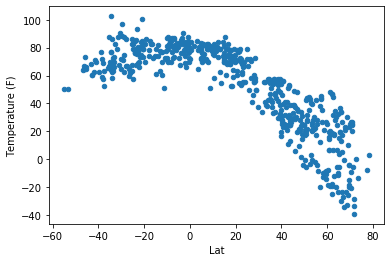

In [130]:
citiesdfdropped.plot.scatter("Lat","Temperature (F)")
plt.savefig('../output_data/LatvsTemp.png')

#### Latitude vs. Humidity Plot

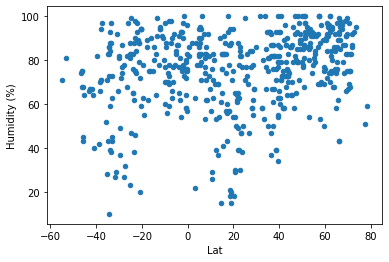

In [131]:
citiesdfdropped.plot.scatter("Lat","Humidity (%)")
plt.savefig('../output_data/LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

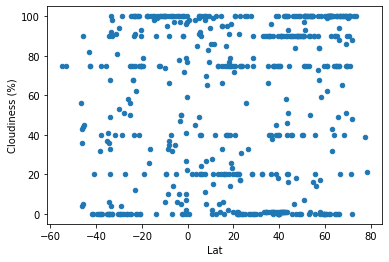

In [132]:
citiesdfdropped.plot.scatter("Lat","Cloudiness (%)")
plt.savefig('../output_data/LatvsClouds.png')

#### Latitude vs. Wind Speed Plot

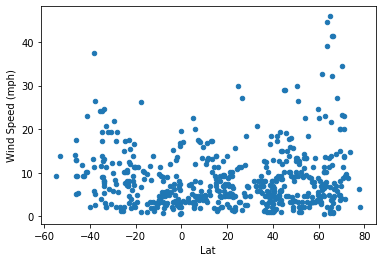

In [133]:
citiesdfdropped.plot.scatter("Lat","Wind Speed (mph)")
plt.savefig('../output_data/LatvsWind.png')

## Linear Regression

In [134]:
# OPTIONAL: Create a function to create Linear Regression plots


In [135]:
# Create Northern and Southern Hemisphere DataFrames
northerndf=citiesdfdropped.loc[citiesdfdropped["Lat"]>=0]
southerndf=citiesdfdropped.loc[citiesdfdropped["Lat"]<0]
northerndf

,City,Lat,Lng,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
1,praia da vitoria,38.73,-27.07,57.20,82.0,75.0,16.71
2,meulaboh,4.14,96.13,80.67,78.0,85.0,7.36
3,mawlaik,23.63,94.42,67.08,38.0,0.0,1.57
5,yarada,17.65,83.27,68.00,100.0,40.0,2.24
6,livermore,37.68,-121.77,55.45,82.0,1.0,4.70
...,...,...,...,...,...,...,...
605,bilma,18.69,12.92,59.02,21.0,14.0,9.22
606,san pedro,14.35,121.02,83.70,61.0,20.0,11.41
607,takoradi,4.88,-1.76,77.76,90.0,99.0,3.04
608,longyan,25.11,117.02,79.00,99.0,100.0,3.40


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

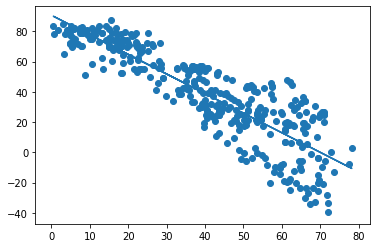

In [136]:
# northerndf.sort_values(["Temperature (F)"], ascending=False, inplace=True)
# northerndf
# northerngroupeddf=northerndf.groupby(["Lat"]).first()

# slope, intercept, r_value, p_value, sem = linregress(northerngroupeddf.index.values,northerngroupeddf["Temperature (F)"])
# plt.plot(northerngroupeddf.index.values, slope*northerngroupeddf.index.values+intercept)
# plt.scatter(northerngroupeddf.index.values,northerngroupeddf["Temperature (F)"])

slope, intercept, r_value, p_value, sem = linregress(northerndf["Lat"],northerndf["Temperature (F)"])
plt.plot(northerndf["Lat"], slope*northerndf["Lat"]+intercept)
plt.scatter(northerndf["Lat"],northerndf["Temperature (F)"])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

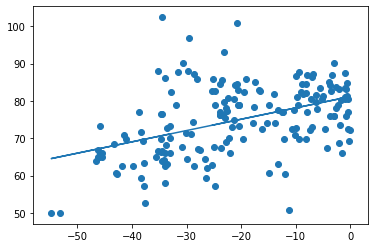

In [137]:
# southerndf.sort_values(["Temperature (F)"], ascending=False, inplace=True)
# southerndf
# southerngroupeddf=southerndf.groupby(["Lat"]).first()

# slope, intercept, r_value, p_value, sem = linregress(southerngroupeddf.index.values,southerngroupeddf["Temperature (F)"])
# plt.plot(southerngroupeddf.index.values, slope*southerngroupeddf.index.values+intercept)
# plt.scatter(southerngroupeddf.index.values,southerngroupeddf["Temperature (F)"])
slope, intercept, r_value, p_value, sem = linregress(southerndf["Lat"],southerndf["Temperature (F)"])
plt.plot(southerndf["Lat"], slope*southerndf["Lat"]+intercept)
plt.scatter(southerndf["Lat"],southerndf["Temperature (F)"])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

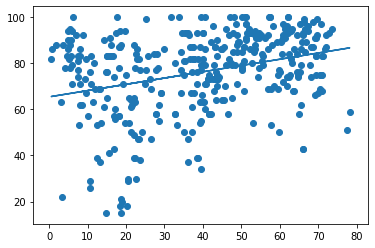

In [138]:
slope, intercept, r_value, p_value, sem = linregress(northerndf["Lat"],northerndf["Humidity (%)"])
plt.plot(northerndf["Lat"], slope*northerndf["Lat"]+intercept)
plt.scatter(northerndf["Lat"],northerndf["Humidity (%)"])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

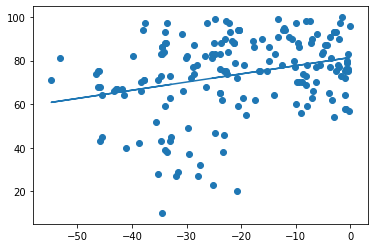

In [139]:
slope, intercept, r_value, p_value, sem = linregress(southerndf["Lat"],southerndf["Humidity (%)"])
plt.plot(southerndf["Lat"], slope*southerndf["Lat"]+intercept)
plt.scatter(southerndf["Lat"],southerndf["Humidity (%)"])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

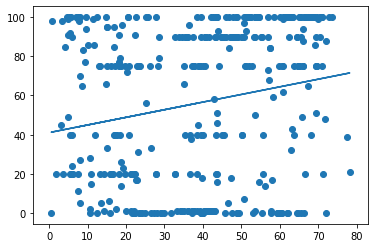

In [140]:
slope, intercept, r_value, p_value, sem = linregress(northerndf["Lat"],northerndf["Cloudiness (%)"])
plt.plot(northerndf["Lat"], slope*northerndf["Lat"]+intercept)
plt.scatter(northerndf["Lat"],northerndf["Cloudiness (%)"])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

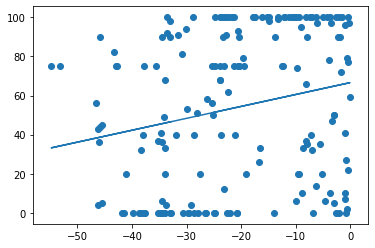

In [141]:
slope, intercept, r_value, p_value, sem = linregress(southerndf["Lat"],southerndf["Cloudiness (%)"])
plt.plot(southerndf["Lat"], slope*southerndf["Lat"]+intercept)
plt.scatter(southerndf["Lat"],southerndf["Cloudiness (%)"])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

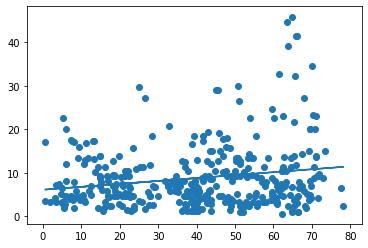

In [142]:
slope, intercept, r_value, p_value, sem = linregress(northerndf["Lat"],northerndf["Wind Speed (mph)"])
plt.plot(northerndf["Lat"], slope*northerndf["Lat"]+intercept)
plt.scatter(northerndf["Lat"],northerndf["Wind Speed (mph)"])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

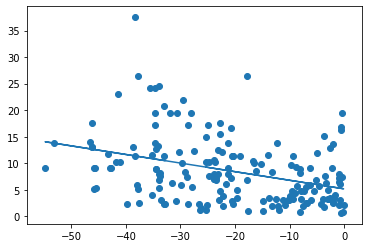

In [143]:
slope, intercept, r_value, p_value, sem = linregress(southerndf["Lat"],southerndf["Wind Speed (mph)"])
plt.plot(southerndf["Lat"], slope*southerndf["Lat"]+intercept)
plt.scatter(southerndf["Lat"],southerndf["Wind Speed (mph)"])